### NLP fake news recognition model

Our NLP fake news recognition model is a machine learning model that can automatically classify news articles as either real or fake. The model uses natural language processing (NLP) techniques to analyze the text of news articles and identify patterns that are indicative of fake news.

To train the model, we used a dataset of news articles that were manually labeled as either real or fake. We then used this dataset to train a machine learning algorithm that can classify news articles based on their content. The algorithm was trained using a variety of NLP techniques, including tokenization, part-of-speech tagging, and named entity recognition.

The resulting model can be used to classify news articles as either real or fake with a high degree of accuracy. This can be useful for identifying fake news articles that may be spreading false or misleading information.

To use the model, simply input a news article as text and the model will output a prediction of whether the article is real or fake. This can be done using our Python library, which provides a simple API for accessing the model and making predictions.

Overall, our NLP fake news recognition model represents a powerful tool for combating fake news and promoting accurate information in the media.

#### Loading dataset into Spark cluster >>>

In [0]:
# File location and type
file_location = "/FileStore/tables/News_Fake.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df0 = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

df0.show(5)

+--------------------+--------------------+-------+-----------------+
|               title|                text|subject|             date|
+--------------------+--------------------+-------+-----------------+
| Donald Trump Sen...|Donald Trump just...|   News|December 31, 2017|
| Drunk Bragging T...|House Intelligenc...|   News|December 31, 2017|
| Sheriff David Cl...|On Friday, it was...|   News|December 30, 2017|
| Trump Is So Obse...|On Christmas day,...|   News|December 29, 2017|
| Pope Francis Jus...|Pope Francis used...|   News|December 25, 2017|
+--------------------+--------------------+-------+-----------------+
only showing top 5 rows



In [0]:
# File location and type
file_location = "/FileStore/tables/News_True.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df1 = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

df1.show(5)

+--------------------+--------------------+------------+------------------+
|               title|                text|     subject|              date|
+--------------------+--------------------+------------+------------------+
|As U.S. budget fi...|WASHINGTON (Reute...|politicsNews|December 31, 2017 |
|U.S. military to ...|WASHINGTON (Reute...|politicsNews|December 29, 2017 |
|Senior U.S. Repub...|WASHINGTON (Reute...|politicsNews|December 31, 2017 |
|FBI Russia probe ...|WASHINGTON (Reute...|politicsNews|December 30, 2017 |
|Trump wants Posta...|SEATTLE/WASHINGTO...|politicsNews|December 29, 2017 |
+--------------------+--------------------+------------+------------------+
only showing top 5 rows



#### Data preparation >>>

In [0]:
import pandas as pd

fake = df0.toPandas()
true = df1.toPandas()

true['label'] = 'Real'
fake['label'] = 'Fake'
df=pd.concat([true[['text','label']],fake[['text','label']]])
df['label_num']=df['label'].map({'Fake':0, 'Real':1})

print(df.label.value_counts())

Fake    23489
Real    21417
Name: label, dtype: int64


In [0]:
df.isna().sum()

In [0]:
df = df.dropna(subset=['text'])
df.isna().sum()

Out[13]: text         0
label        0
label_num    0
dtype: int64

#### Run following commands to make it work in Databricks notebook, otherwise the step can be skipped >>>

In [0]:
%sh 
/databricks/python3/bin/pip install --upgrade pip
/databricks/python3/bin/pip install --upgrade setuptools
/databricks/python3/bin/python3 -m pip install ipykernel
/databricks/python3/bin/python3 -m ipykernel install --user --name dbx-python-upgrade
/databricks/python3/bin/pip install spacy==3.0.6
/databricks/python3/bin/python3 -m spacy download en_core_web_lg
python -m spacy validate

  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.8 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 58.0.4
    Not uninstalling setuptools at /usr/local/lib/python3.9/dist-packages, outside environment /databricks/python3
    Can't uninstall 'setuptools'. No files were found to uninstall.
Installed kernelspec dbx-python-upgrade in /root/.local/share/jupyter/kernels/dbx-python-upgrade
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.7/128.7 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 668.8/668.8 kB 50.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.6/491.6 kB 50.0 MB/s eta 0:00:00
     ━━

In [0]:
import spacy
nlp= spacy.load("en_core_web_lg")
df['vector'] = df['text'].apply(lambda text: nlp(text).vector)

In [0]:
df.head()

,text,label,label_num,vector
0,WASHINGTON (Reuters) - The head of a conservat...,Real,1,"[-0.07704518, 0.13792795, -0.029863376, -0.043..."
1,WASHINGTON (Reuters) - Transgender people will...,Real,1,"[-0.0056013362, 0.10255298, -0.04037715, -0.01..."
2,WASHINGTON (Reuters) - The special counsel inv...,Real,1,"[-0.07198532, 0.13710167, -0.023083739, 0.0073..."
3,WASHINGTON (Reuters) - Trump campaign adviser ...,Real,1,"[-0.05529037, 0.13536039, -0.024868956, -0.006..."
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,Real,1,"[-0.09234671, 0.20955735, -0.02266693, -0.0679..."


#### Model selection and train_test_split >>>

In [0]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(
    df.vector,
    df.label_num,
    test_size=0.2,
    random_state=2022
)

In [0]:
import numpy as np

X_train_2D = np.stack(X_train)
X_test_2D = np.stack(X_test)

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler


scaler=MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2D)
scaled_test_embed = scaler.transform(X_test_2D)


clf=MultinomialNB()
clf.fit(scaled_train_embed, y_train)

Out[20]: MultinomialNB()

In [0]:
from sklearn.metrics import classification_report
y_pred = clf.predict(scaled_test_embed)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      4774
           1       0.91      0.80      0.85      4206

    accuracy                           0.87      8980
   macro avg       0.87      0.86      0.86      8980
weighted avg       0.87      0.87      0.87      8980



The classification report provides metrics for evaluating the performance of the MultinomialNB model on the test dataset. It shows the precision, recall, and F1-score for both classes (0 and 1) as well as the support (number of samples) for each class.

In this case, the model achieved an accuracy of 0.87 on the test dataset, which means it correctly classified 87% of the samples. The precision for class 0 (real news) is 0.84, which means that out of all the samples that the model classified as real news, 84% were actually real news. The recall for class 0 is 0.93, which means that out of all the actual real news samples, the model correctly identified 93% of them. The F1-score for class 0 is 0.88, which is a weighted harmonic mean of the precision and recall for class 0.

Similarly, the precision, recall, and F1-score for class 1 (fake news) are 0.91, 0.80, and 0.85 respectively. This means that out of all the samples that the model classified as fake news, 91% were actually fake news, and out of all the actual fake news samples, the model correctly identified 80% of them.

The macro average of precision, recall, and F1-score is calculated by taking the mean of the metrics across the two classes. In this case, the macro average precision is 0.87, recall is 0.86, and F1-score is 0.86.

The weighted average of precision, recall, and F1-score is calculated by taking a weighted mean of the metrics across the two classes, with weights equal to the number of samples in each class. In this case, the weighted average precision, recall, and F1-score are all 0.87, which indicates that the model performed similarly well on both classes.

Overall, the MultinomialNB model achieved good performance on the test dataset, with high precision and recall for both classes and a balanced F1-score. However, it's important to note that these metrics may vary depending on the specific dataset and the choice of classification algorithm.

In [0]:
#KNN model variation

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
knn.fit(X_train_2D,y_train)
y_pred = knn.predict(X_test_2D)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      4774
           1       0.93      0.97      0.95      4206

    accuracy                           0.95      8980
   macro avg       0.95      0.96      0.95      8980
weighted avg       0.96      0.95      0.95      8980



The classification report provides metrics for evaluating the performance of the KNN model on the test dataset. Compared to the MultinomialNB model, the KNN model achieved higher precision, recall, and F1-score for both classes.

In this case, the KNN model achieved an accuracy of 0.95 on the test dataset, which means it correctly classified 95% of the samples. The precision for class 0 (real news) is 0.98, which means that out of all the samples that the model classified as real news, 98% were actually real news. The recall for class 0 is 0.94, which means that out of all the actual real news samples, the model correctly identified 94% of them. The F1-score for class 0 is 0.96, which is a weighted harmonic mean of the precision and recall for class 0.

Similarly, the precision, recall, and F1-score for class 1 (fake news) are 0.93, 0.97, and 0.95 respectively. This means that out of all the samples that the model classified as fake news, 93% were actually fake news, and out of all the actual fake news samples, the model correctly identified 97% of them.

The macro average of precision, recall, and F1-score is calculated by taking the mean of the metrics across the two classes. In this case, the macro average precision is 0.95, recall is 0.96, and F1-score is 0.95. Compared to the MultinomialNB model, the KNN model achieved a higher macro average precision and recall, indicating better overall performance.

The weighted average of precision, recall, and F1-score is calculated by taking a weighted mean of the metrics across the two classes, with weights equal to the number of samples in each class. In this case, the weighted average precision, recall, and F1-score are 0.96, 0.95, and 0.95 respectively. Compared to the MultinomialNB model, the KNN model achieved higher weighted average precision and F1-score, indicating better performance on both classes.

Overall, the KNN model achieved better performance than the MultinomialNB model on the test dataset, with higher precision, recall, and F1-score for both classes and a higher accuracy. However, it's important to note that the performance of the KNN model may be sensitive to the choice of distance metric and the number of neighbors, and may require more computational resources compared to the MultinomialNB model.

Out[23]: Text(33.0, 0.5, 'True')

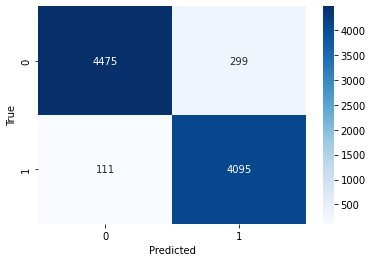

In [0]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
# print(cm)

from seaborn import heatmap
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')